In [1]:
%load_ext autoreload
%autoreload 2
#new testing
import glob
from fibsem.segmentation.model import SegmentationModel
import tifffile as tf
import matplotlib.pyplot as plt


from random import shuffle

import numpy as np
from fibsem.detection.utils import  FeatureType, DetectionResult #, Feature
from fibsem.detection.detection import NeedleTip, LamellaCentre
# from autoscript_sdb_microscope_client.structures import AdornedImage

from fibsem.structures import Point
from fibsem.imaging import masks
from fibsem.detection import detection
import skimage

from pathlib import Path
from dataclasses import dataclass

from fibsem import conversions


from pprint import pprint


from fibsem.segmentation.model import load_model

c:\Users\rkan0039\Anaconda3\envs\fibsem\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Detection Goals


1. Detect Needle Tip
2. Detect Lamella Centre
3. Detect Lamella Edges (Right / Left, Up / Down)

account for multiple lamellas
mask centre?

In [2]:
# data

from fibsem import config



# filenames = glob.glob(r"C:\Users\Admin\Github\fibsem\fibsem\segmentation\data\train\images/*.tif")
filenames = glob.glob(r"C:\Users\rkan0039\Documents\detection_training\images\*.tif")
print(len(filenames))

93


In [3]:
checkpoint = r"C:\Users\rkan0039\Documents\detection_training\models\model4.pt"
model = load_model(checkpoint)

In [4]:
def to_bounding_box(contour):
    # convert a contour to bounding box (xc, yc, w, h)
    # ref : https://muthu.co/draw-bounding-box-around-contours-skimage/

    xmin, xmax = np.min(contour[:, 1]), np.max(contour[:, 1])
    ymin, ymax = np.min(contour[:, 0]), np.max(contour[:, 0])

    w = (xmax - xmin)
    h = (ymax - ymin)
    xc = xmin + w // 2
    yc = ymin + h // 2
    
    return [xc, yc, w, h]

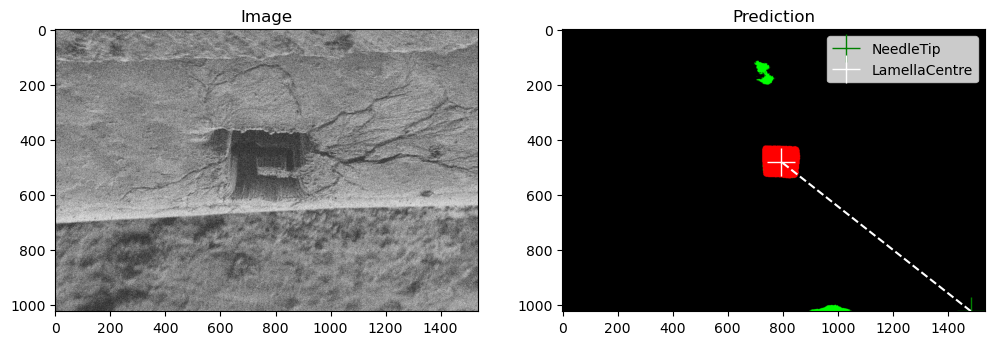

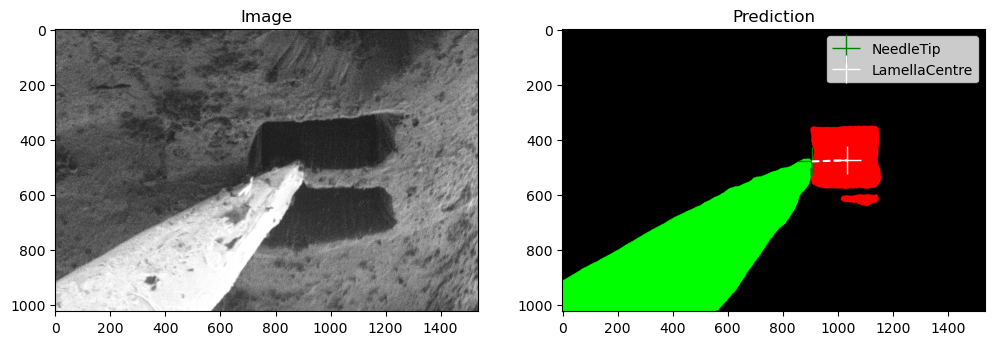

KeyboardInterrupt: 

In [7]:
# shuffle(filenames)
for i, fname in enumerate(filenames):

    img = tf.imread(fname)

    # inference
    mask = model.inference(img)

    # detect features
    # features = [Feature(FeatureType.NeedleTip), 
    #                 Feature(FeatureType.LamellaCentre)]
    features = [NeedleTip(feature_m=None,feature_px=None),LamellaCentre(feature_m=None,feature_px=None)]
    det = detection.locate_shift_between_features_v2(img, model, features=features, pixelsize=10e-9)

    # plot
    detection.plot_det_result_v2(det)


    if i == 2:
        break

In [ ]:


# data

from fibsem import config



# filenames = glob.glob(r"C:\Users\Admin\Github\fibsem\fibsem\segmentation\data\train\images/*.tif")
filenames = glob.glob(r"C:\Users\rkan0039\Documents\detection_training\images")
print(len(filenames))

# model
checkpoint = r"C:\Users\rkan0039\Documents\detection_training\models\model4.pt"
model = load_model(checkpoint)




def to_bounding_box(contour):
    # convert a contour to bounding box (xc, yc, w, h)
    # ref : https://muthu.co/draw-bounding-box-around-contours-skimage/

    xmin, xmax = np.min(contour[:, 1]), np.max(contour[:, 1])
    ymin, ymax = np.min(contour[:, 0]), np.max(contour[:, 0])

    w = (xmax - xmin)
    h = (ymax - ymin)
    xc = xmin + w // 2
    yc = ymin + h // 2
    
    return [xc, yc, w, h]
    




# THINGS TO TRY:
# masking centre area for lamella
# using contours to extract individual lamellas -> pick centre


shuffle(filenames)
for i, fname in enumerate(filenames):

    img = tf.imread(fname)

    # inference
    mask = model.inference(img)

    # detect features
    features = [Feature(FeatureType.NeedleTip), 
                    Feature(FeatureType.LamellaCentre)]
    det = detection.locate_shift_between_features_v2(img, model, features=features, pixelsize=10e-9)

    # plot
    detection.plot_det_result_v2(det)


    if i == 5:
        break


In [ ]:


# mask helper


# centre circle
# left/right half
# top/bottom half


from fibsem.imaging import masks
import numpy as np


arr = np.zeros(shape=(720, 1200 ))

circ_mask = masks.create_circle_mask(arr.shape, radius=128)

bl_mask = masks.create_area_mask(arr, left=True, lower=True)
ul_mask = masks.create_area_mask(arr, left=True, upper=True)
br_mask = masks.create_area_mask(arr, left=True, lower=True)
ur_mask = masks.create_area_mask(arr, right=True, upper=True)
mask = masks.create_area_mask(arr, left=True)


fig, ax = plt.subplots(1, 5, figsize=(15, 7))
ax[0].imshow(bl_mask)
ax[1].imshow(ul_mask)
ax[2].imshow(br_mask)
ax[3].imshow(ur_mask)
ax[4].imshow(mask)
plt.show()



In [ ]:
# contour stuff
    # options for getting individual lamella from multiple: contours, masking 
    # bboxes = []
    # contours = skimage.measure.find_contours(lamella_mask[:, :, 0].astype(np.uint8), 0.8)
    # for contour in contours:
    #     bboxes.append(to_bounding_box(contour))
        # for contour in contours:
    #     ax[1].plot(contour[:, 1], contour[:, 0], color="white", linewidth=1)
    

In [ ]:
## vertical mask for eucentric correction

# autoreload 2
%load_ext autoreload
%autoreload 2

from fibsem.imaging import masks
import numpy as np
import matplotlib.pyplot as plt

# mask only the central vertical area
arr = np.zeros(shape=(1024, 1536 ))

mask = masks.create_vertical_mask(arr)

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.imshow(mask)
plt.show()

